# Introduction

Welcome to the <b>Y.Afisha</b> Marketing Optimization Project! 

This project is part of an externship opportunity in the analytical department of <b>Y.Afisha</b>. The primary objective of this project is to help optimize Y.Afisha's marketing expenses by analyzing customer behavior, sales, and marketing costs.

In this project, we will be working with three key datasets: 

- 1.- Server logs detailing user visits to Y.Afisha from January 2017 to December 2018.
- 2.- Information about orders placed by users during this period.
- 3.- Statistics on marketing expenses over the same timeframe. 

Our analysis will focus on understanding how customers use the service, when they start making purchases, and how much revenue each customer generates. 

We will also analyze sales metrics such as the number of orders, their frequency, the average purchase size, and the customer lifetime value (LTV). 

Additionally, we will evaluate the total marketing expenditure, determine the cost of customer acquisition for each marketing source, and assess the return on marketing investment (ROMI).



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

## Pre-Processing

We will begin by downloading the datasets and preparing them for analysis. This involves optimizing the data by ensuring each column has the correct data type, cleaning the data by handling null values and duplicates, and standardizing column names to a consistent format. Once the data is prepared, we will calculate various metrics and create reports to provide insights into daily, weekly, and monthly user numbers, the number of sessions per day, session duration, user return frequency, and the time between registration and the first purchase.

### Visits DataFrame

In [2]:
# We are going to bring all the data and save it in a variable. We're stating some parameters, since the dataframe is considerably big
visitsdf = pd.read_csv(
    'https://raw.githubusercontent.com/ricardosillercardenas/da_projects_dataframes/main/yafisha_visits_log_us.csv',
    dtype={'Device': 'category'},
    parse_dates=['Start Ts', 'End Ts'],
)

# We're doing minor changes which help us visualize the names better and lessen the size of the memory
visitsdf.columns = visitsdf.columns.str.lower().str.replace(' ', '_')

# Reordering the columns
visitsdf = visitsdf[['uid', 'device', 'start_ts', 'end_ts', 'source_id']]

# I'm dropping these two indexes because they have swapped dates.
visitsdf = visitsdf.drop(4181)
visitsdf = visitsdf.drop(177972)

# Let's see what we've got:
print(visitsdf.info())
print('_'*75)
print(visitsdf.head())


<class 'pandas.core.frame.DataFrame'>
Index: 359398 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   uid        359398 non-null  uint64        
 1   device     359398 non-null  category      
 2   start_ts   359398 non-null  datetime64[ns]
 3   end_ts     359398 non-null  datetime64[ns]
 4   source_id  359398 non-null  int64         
dtypes: category(1), datetime64[ns](2), int64(1), uint64(1)
memory usage: 14.1 MB
None
___________________________________________________________________________
                    uid   device            start_ts              end_ts  \
0  16879256277535980062    touch 2017-12-20 17:20:00 2017-12-20 17:38:00   
1    104060357244891740  desktop 2018-02-19 16:53:00 2018-02-19 17:21:00   
2   7459035603376831527    touch 2017-07-01 01:54:00 2017-07-01 01:54:00   
3  16174680259334210214  desktop 2018-05-20 10:59:00 2018-05-20 11:23:00   
4   996969482003

### Orders DataFrame

In [3]:
# We are going to bring all the data and save it in a variable. We're stating some parameters, since the dataframe is considerably big
ordersdf = pd.read_csv(
    'https://raw.githubusercontent.com/ricardosillercardenas/da_projects_dataframes/main/yafisha_orders_log_us.csv',
    parse_dates=['Buy Ts'],
)

# We're doing minor changes which help us visualize the names better and lessen the size of the memory
ordersdf.columns = ordersdf.columns.str.lower().str.replace(' ', '_')

# Reordering the columns
ordersdf = ordersdf[['uid', 'buy_ts', 'revenue']]

# I'm dropping the index 50414, since there's only one register there and it will affect a further cohort analysis. We don't need this register.
ordersdf = ordersdf.drop(50414)

# Let's see what we've got:
print(ordersdf.info())
print('_'*75)
print(ordersdf.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50414 entries, 0 to 50413
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   uid      50414 non-null  uint64        
 1   buy_ts   50414 non-null  datetime64[ns]
 2   revenue  50414 non-null  float64       
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB
None
___________________________________________________________________________
                    uid              buy_ts  revenue
0  10329302124590727494 2017-06-01 00:10:00    17.00
1  11627257723692907447 2017-06-01 00:25:00     0.55
2  17903680561304213844 2017-06-01 00:27:00     0.37
3  16109239769442553005 2017-06-01 00:29:00     0.55
4  14200605875248379450 2017-06-01 07:58:00     0.37


### Costs DataFrame

In [4]:
# The dataframe which contains cost data doesn't need special parameters, since it has the appropiate size, so this goes directly to its intended variable
costsdf = pd.read_csv('https://raw.githubusercontent.com/ricardosillercardenas/da_projects_dataframes/main/yafisha_costs_us.csv', parse_dates=['dt'])

# We're doing minor changes which help us visualize the names better and lessen the size of the memory
costsdf.columns = costsdf.columns.str.lower().str.replace(' ', '_')

# Reordering the columns
costsdf = costsdf[['dt', 'costs', 'source_id']]

# Let's see what we've got:
print(costsdf.info())
print('_'*75)
print(costsdf.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   dt         2542 non-null   datetime64[ns]
 1   costs      2542 non-null   float64       
 2   source_id  2542 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB
None
___________________________________________________________________________
          dt  costs  source_id
0 2017-06-01  75.20          1
1 2017-06-02  62.25          1
2 2017-06-03  36.53          1
3 2017-06-04  55.00          1
4 2017-06-05  57.08          1


## Exploratory Data Analysis

We will delve into exploratory metrics in order to get some insights and trends over time.

### Revenue Exploration

I'm starting with the numbers that matter the most to Y.Afisha: money that comes in and money that goes out. Let's check how revenue has behaved in the given time frame. But first, let's merge the visitsdf and ordersdf dataframes, as we will be using this join between both:

In [5]:
visits_orders_merge = pd.merge(visitsdf, ordersdf, on='uid')
visits_orders_merge['date'] = visits_orders_merge['buy_ts'].dt.date

Alright, let's proceed with the revenue analysis:

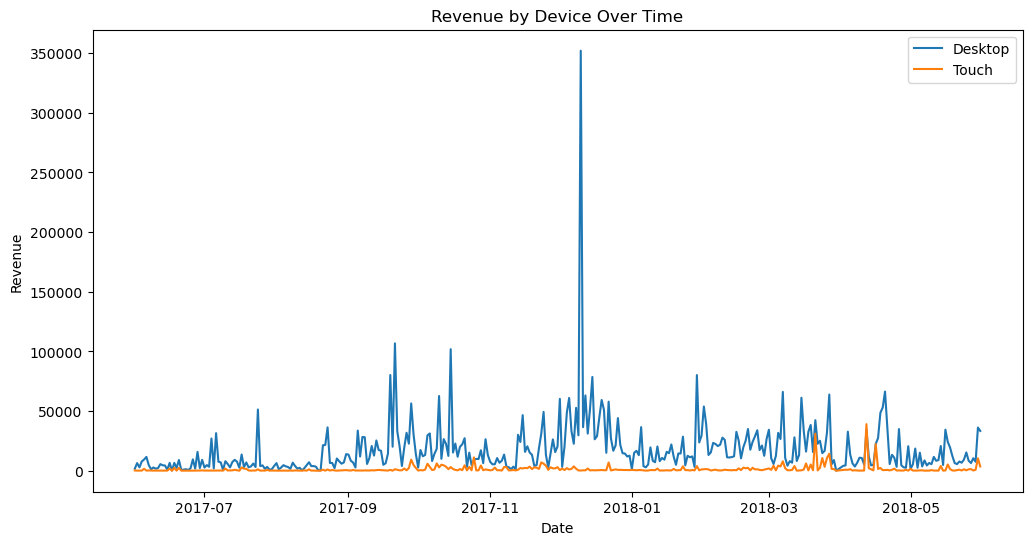

In [6]:
# Group by date and device and sum the revenue
revenue_by_device_date = visits_orders_merge.groupby(['date', 'device'])['revenue'].sum().unstack()

plt.figure(figsize=(12, 6))
plt.plot(revenue_by_device_date.index, revenue_by_device_date['desktop'], label='Desktop')
plt.plot(revenue_by_device_date.index, revenue_by_device_date['touch'], label='Touch')

plt.xlabel('Date')
plt.ylabel('Revenue')
plt.title('Revenue by Device Over Time')
plt.legend()
plt.grid(False)
plt.show()


It seems there are some outliers present. The best way to confirm this is to generate a boxplot:

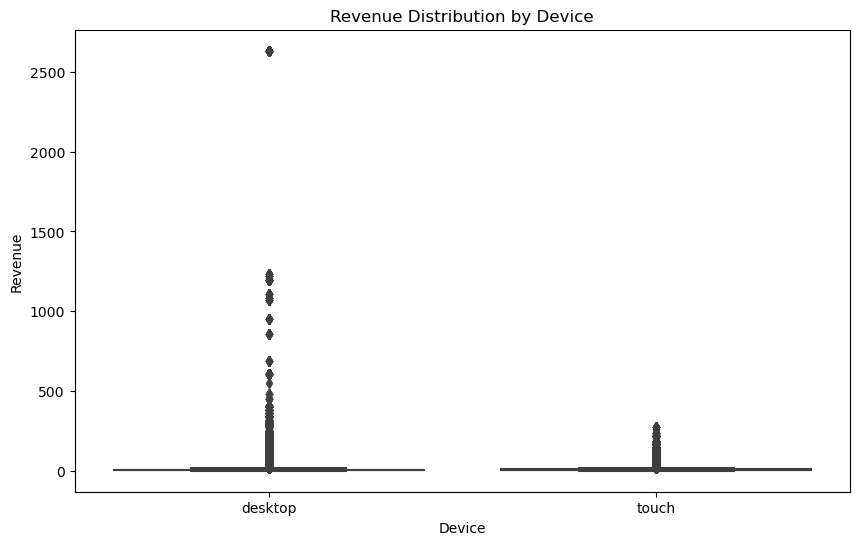

In [7]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='device', y='revenue', data=visits_orders_merge)
plt.title('Revenue Distribution by Device')
plt.xlabel('Device')
plt.ylabel('Revenue')
plt.show()

Alright, here they are. If we check the revenue description, we will discover interesting things:

In [8]:
ordersdf['revenue'].describe()

count    50414.000000
mean         4.999678
std         21.818574
min          0.000000
25%          1.220000
50%          2.500000
75%          4.890000
max       2633.280000
Name: revenue, dtype: float64

The description tells us that while the mean revenue is 4.9, we have a maximum value of 2,633, which is far beyond the interquartile range. There may be more such values in the dataframe. These outliers could introduce bias to our analysis, so we need to get rid of them.

By applying the z-score statistical method, we can identify outliers that lie beyond 3 standard deviations. If they do not represent a significant quantity from the total of regiestries, we can remove them in order to make a better analysis.

Let's find those outliers by calculating the Z-Score:

In [9]:
z_scores = stats.zscore(ordersdf['revenue'])
threshold = 3

outliers_z_score = ordersdf[(z_scores > threshold) | (z_scores < -threshold)]

print("Outliers using Z-Score:")
print(outliers_z_score['revenue'].sort_values(ascending=False))

Outliers using Z-Score:
23244    2633.28
36522    1236.28
36682    1221.37
23165    1195.64
24607    1109.10
          ...   
50367      73.33
24512      73.03
42345      72.72
37764      72.11
17855      72.11
Name: revenue, Length: 201, dtype: float64


The calculation reveals there are 201 possible outliers in the dataframe, representing roughly <b>0.39%</b> of the total records. If we eliminate them, they will not significantly impact further analysis.

In [10]:
ordersdf = ordersdf[~ordersdf.index.isin(outliers_z_score.index)]

# Let's verify how our dataframe looks in the end:
print("DataFrame original (con outliers):")
print(ordersdf['revenue'].describe())

DataFrame original (con outliers):
count    50213.000000
mean         4.238929
std          5.627799
min          0.000000
25%          1.220000
50%          2.440000
75%          4.890000
max         69.670000
Name: revenue, dtype: float64


Alright, let's take a second look to the revenue by device over time graph (We'll have to declare the same variables so the changes make effect):

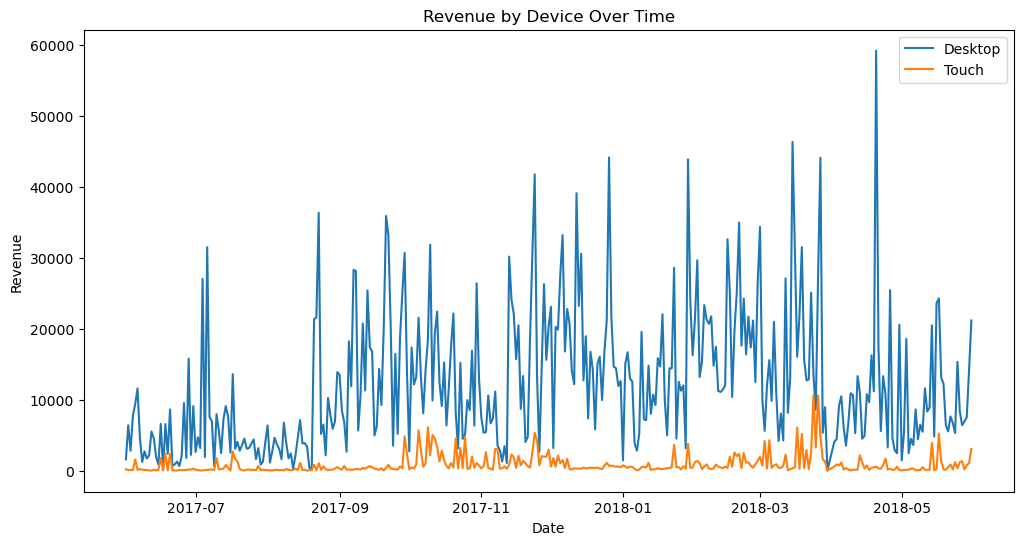

In [11]:
visits_orders_merge = pd.merge(visitsdf, ordersdf, on='uid')
visits_orders_merge['date'] = visits_orders_merge['buy_ts'].dt.date
revenue_by_device_date = visits_orders_merge.groupby(['date', 'device'])['revenue'].sum().unstack()

plt.figure(figsize=(12, 6))
plt.plot(revenue_by_device_date.index, revenue_by_device_date['desktop'], label='Desktop')
plt.plot(revenue_by_device_date.index, revenue_by_device_date['touch'], label='Touch')

plt.xlabel('Date')
plt.ylabel('Revenue')
plt.title('Revenue by Device Over Time')
plt.legend()
plt.grid(False)
plt.show()

It looks better, although there is still some "noise" represented by spikes. However, we can see that the platform generates more revenue from desktop computers than from touch devices.

The marketing department operates 8 sources of traffic, represented by numbers (1, 2, 3, 4, 5, 7, 9, and 10). These categories don't tell us exactly which source they refer to (maybe Facebook Ads, maybe Google Ads, who knows).

Still, we can see the revenue each of them generates:

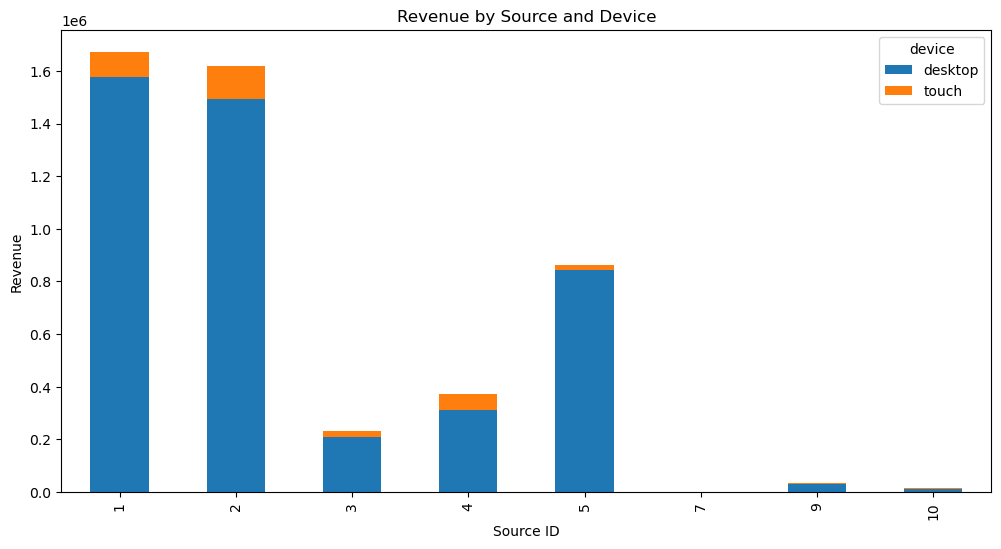

In [12]:
revenue_by_source_device = visits_orders_merge.groupby(['source_id', 'device'])['revenue'].sum().unstack()
revenue_by_source_device.plot(kind='bar', stacked=True, figsize=(12, 6), title='Revenue by Source and Device')
plt.xlabel('Source ID')
plt.ylabel('Revenue')
plt.show()

Alright, now let's take a look how much these sources cost us:

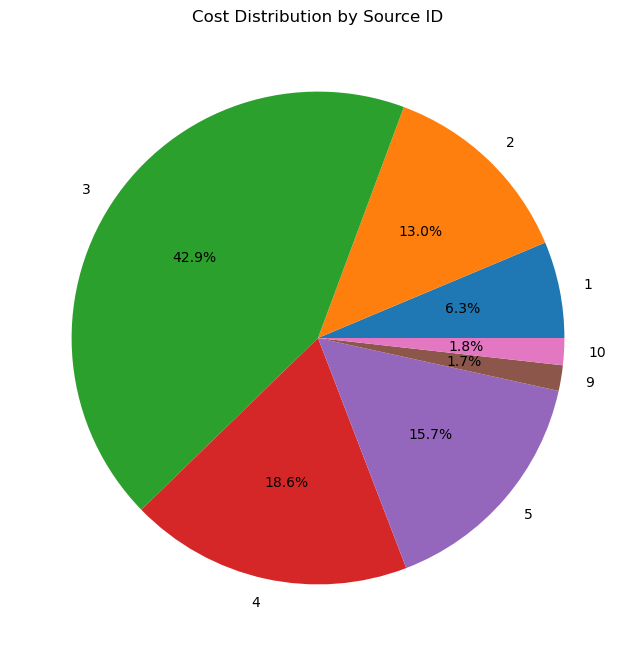

In [13]:
cost_distribution = costsdf.groupby('source_id')['costs'].sum()
cost_distribution.plot(kind='pie', figsize=(8, 8), title='Cost Distribution by Source ID', autopct='%1.1f%%')
plt.ylabel('')
plt.show()

This is interesting; Sources 3 and 4 generate too little revenue (12.6% of the total revenue), but combined, they represent 61.5% of marketing costs. 

In contrast, <b>sources 1 and 2 represent 19.3% of the marketing costs, but generates 68.5% of the total revenue:</b>

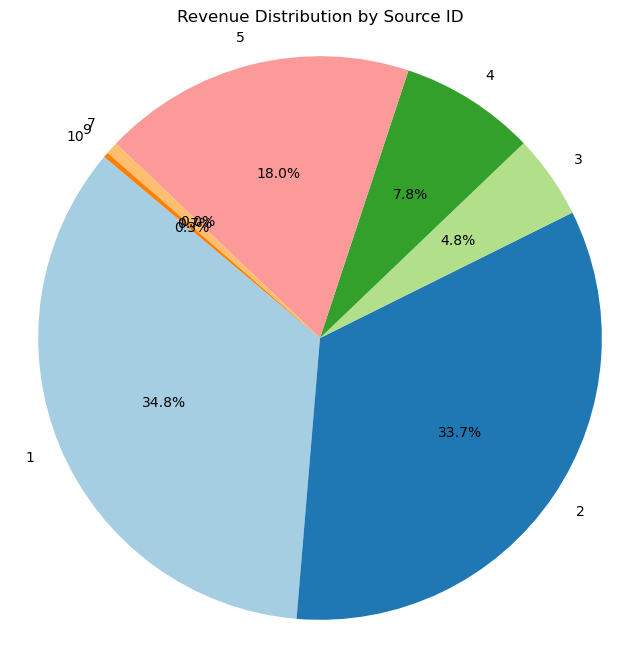

In [14]:
# Group by source_id and sum the revenues
revenue_by_source = visits_orders_merge.groupby('source_id')['revenue'].sum()

plt.figure(figsize=(8, 8))
plt.pie(revenue_by_source, labels=revenue_by_source.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Revenue Distribution by Source ID')

plt.axis('equal') 
plt.show()

In summary, sources 1 and 2 have proven to be the most profitable, while sources 3 and 4 need to be reconsidered. A similar conclusion can be drawn if we examine the cumulative revenue by source.

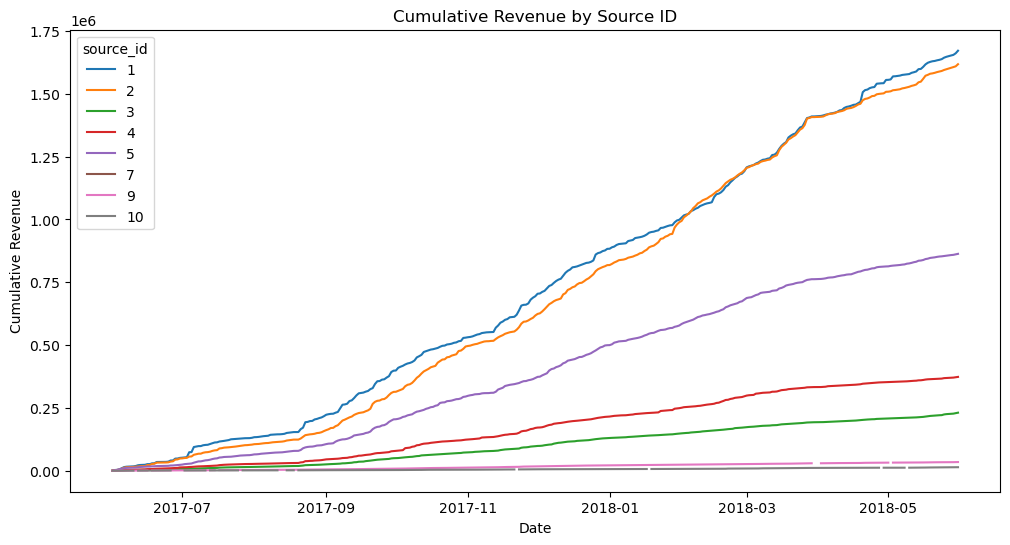

In [15]:
cumulative_revenue_by_source = visits_orders_merge.groupby(['date', 'source_id'])['revenue'].sum().groupby(level=1).cumsum().unstack()
cumulative_revenue_by_source.plot(kind='line', figsize=(12, 6), title='Cumulative Revenue by Source ID')
plt.xlabel('Date')
plt.ylabel('Cumulative Revenue')
plt.show()

Here we can see that sources 1 and 2 have been the ones which have generated cumulative revenue the most, while sources 3 and 4 don't even reach the levels of revenue generated by source 5.

None the less, here's a curious thing: Sources 3 and 4 are the ones that have been bringing in users the most:

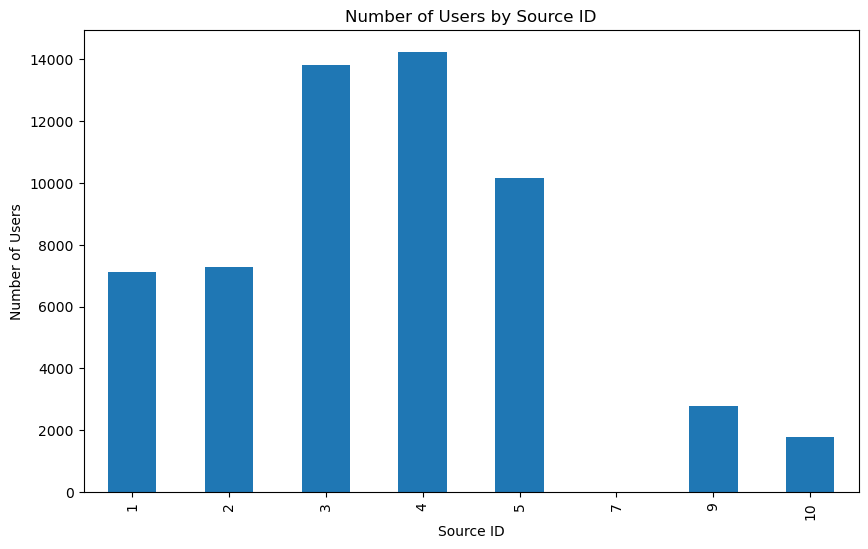

In [16]:
customers_by_source = visits_orders_merge.groupby('source_id')['uid'].nunique()
customers_by_source.plot(kind='bar', figsize=(10, 6), title='Number of Users by Source ID')
plt.xlabel('Source ID')
plt.ylabel('Number of Users')
plt.show()

The thing here would be for the company to evaluate if there is quality in these users (meaning that they provide "social proof" to paying users who come from other sources).

### User Activity Evaluation

What about the general activity of the users?. We can analyze how much time users spend in the platform, thus, providing us insights regarding how interesting the service is to people who are not yet familiar with it.

Let's start by finding out how many unique visits the platform gets by calculating three main metrics that describe the number of active users:

* DAU (daily active users): the number of daily active users (unique);
* WAU (weekly active users): the number of weekly active users;
* MAU (monthly active users): the number of monthly active users.

To calculate weekly and monthly activity, I will first create separate columns for the values of year, month, and week. Then, I will calculate the metrics by grouping the data by session date/week and find the averages:

In [17]:
visitsdf['session_year']  = visitsdf['start_ts'].dt.year
visitsdf['session_month'] = visitsdf['start_ts'].dt.month
visitsdf['session_week']  = visitsdf['start_ts'].dt.isocalendar().week
visitsdf['session_date'] = visitsdf['start_ts'].dt.date

dau_total = visitsdf.groupby('session_date').agg({'uid': 'nunique'}).mean()
wau_total = visitsdf.groupby(['session_year', 'session_week']).agg({'uid': 'nunique'}).mean()
mau_total = visitsdf.groupby(['session_year', 'session_month']).agg({'uid': 'nunique'}).mean()

print("Daily Average Users:", int(dau_total))
print("Weekly Average Users:", int(wau_total))
print("Monthly Average Users:", int(mau_total))

Daily Average Users: 907
Weekly Average Users: 5716
Monthly Average Users: 23228


/var/folders/p7/dv7dwrpx4fd5tj67j73brvvw0000gn/T/ipykernel_7496/2869853951.py:10: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  print("Daily Average Users:", int(dau_total))
/var/folders/p7/dv7dwrpx4fd5tj67j73brvvw0000gn/T/ipykernel_7496/2869853951.py:11: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  print("Weekly Average Users:", int(wau_total))
/var/folders/p7/dv7dwrpx4fd5tj67j73brvvw0000gn/T/ipykernel_7496/2869853951.py:12: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  print("Monthly Average Users:", int(mau_total))


So, here they are; the numbers of daily, weekly and monhtly unique users the platform receives. Generally, these metrics increase steadily; we can observe that by measuring daily activity throughout time:

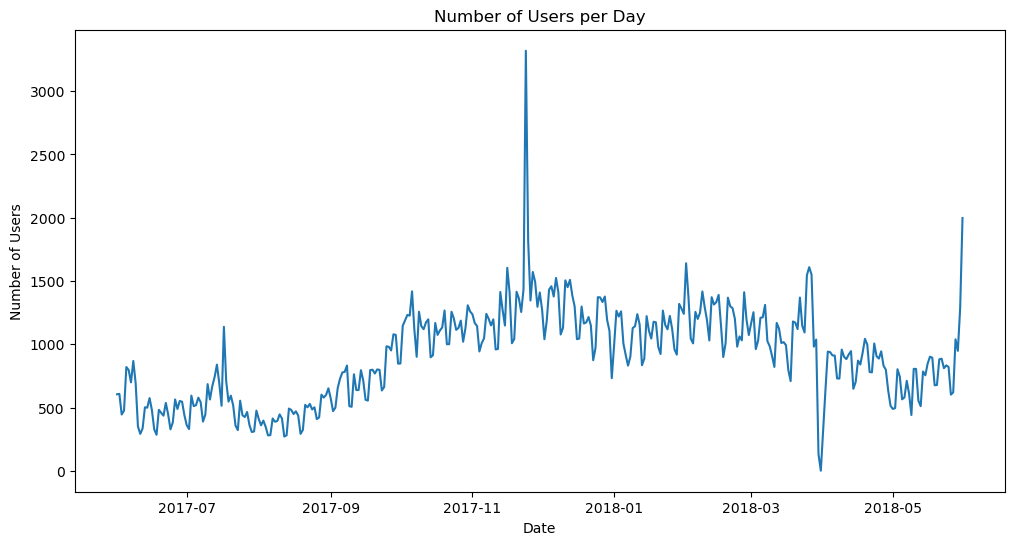

In [18]:
# Number of users per day
visitsdf['date'] = visitsdf['start_ts'].dt.date
users_per_day = visitsdf.groupby('date')['uid'].nunique()

# Plot users per day
plt.figure(figsize=(12, 6))
sns.lineplot(x=users_per_day.index, y=users_per_day.values)
plt.title('Number of Users per Day')
plt.xlabel('Date')
plt.ylabel('Number of Users')
plt.grid(False)
plt.show()

Here we can see periodic peaks and troughs and noticeable fluctuations, indicating possible seasonal or cyclical trends. The little spikes we see across the graph could be weekend based, which would explain why there is so much "noise".

Particularly speaking, there are several significant spikes in user numbers, particularly around late 2017 and early 2018. Also, there are noticeable dips, especially around early 2018. A sharp increase in users is observed at the end of the timeline in mid-2018.

Let's bear in mind; these are unique users, nonetheless, it would be great to have data on how much time they spend on it. Analyzing <b>user sessions</b> can help.

### User Sessions

A user session is the set of user actions that begins when the application is opened and ends when it is closed. For example, it can be useful to determine the number of monthly sessions per user; it's a good indicator of how frequently the app is used.

Let's see what happens with sessions, independently if these users are unique or recurring. Let's see how these numbers compare:

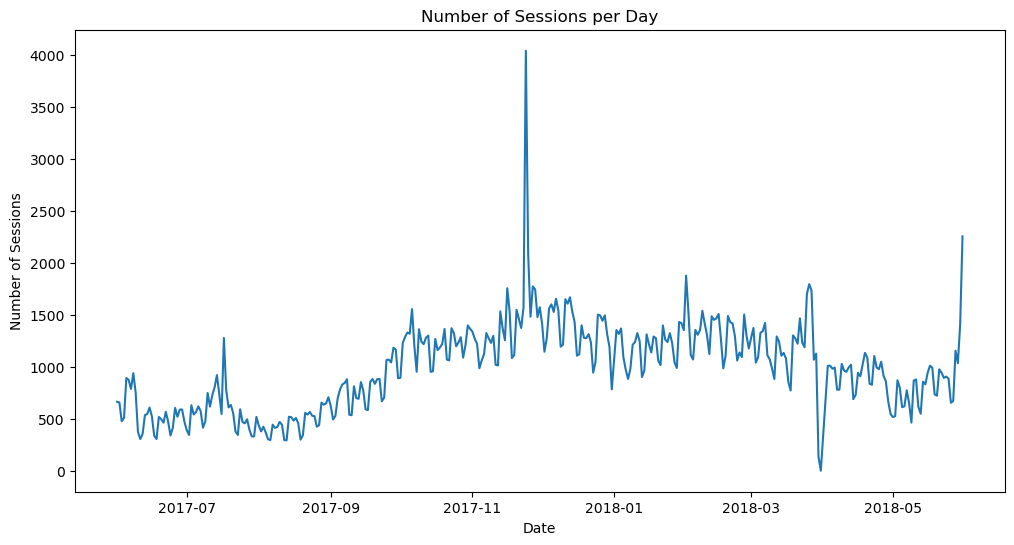

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

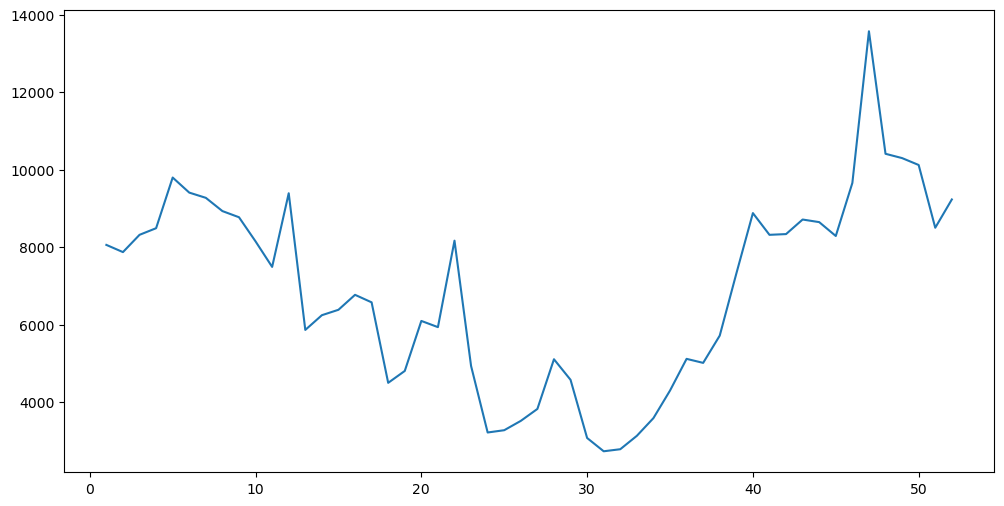

In [19]:
# Number of sessions per day
sessions_per_day = visitsdf.groupby('date')['uid'].count()
sessions_per_week = visitsdf.groupby('session_week')['uid'].count()
sessions_per_month = visitsdf.groupby('session_month')['uid'].count()

# Plot sessions per day
plt.figure(figsize=(12, 6))
sns.lineplot(x=sessions_per_day.index, y=sessions_per_day.values)
plt.title('Number of Sessions per Day')
plt.xlabel('Date')
plt.ylabel('Number of Sessions')
plt.grid(False)
plt.show()

# Plot sessions per week
plt.figure(figsize=(12, 6))
sns.lineplot(x=sessions_per_week.index, y=sessions_per_week.values)
plt.title('Number of Sessions per Week')
plt.xlabel('Date')
plt.ylabel('Number of Sessions')
plt.grid(False)
plt.show()

# Plot sessions per month
plt.figure(figsize=(12, 6))
sns.lineplot(x=sessions_per_month.index, y=sessions_per_month.values)
plt.title('Number of Sessions per Month')
plt.xlabel('Date')
plt.ylabel('Number of Sessions')
plt.grid(False)
plt.show()

Interesting; numbers per day show a pretty different story from numbers per week and month.

<b>Sessions per day</b>
Similar to the users per day, periodic peaks and troughs are present in both graphs, suggesting a seasonal or cyclical pattern in user behavior. The trends in the number of sessions per day closely follow the trends in the number of users per day, implying that the increase in users is likely contributing to the increase in sessions.

Also, both graphs (daily sessions and daily users) show significant spikes around late 2017 and early 2018, and both graphs show a sharp increase towards mid-2018, indicating a surge in user engagement during that period.

<b>Sessions per week and per month</b>
Here's a different story; these two graphics show a hughe dip at the end of the year 2017 and beginning of 2018.

Let's delve deeper:

In [ ]:
visitsdf['session_end_ts'] = pd.to_datetime(visitsdf['end_ts'])
visitsdf['session_year']  = visitsdf['start_ts'].dt.year
visitsdf['session_month'] = visitsdf['start_ts'].dt.month
sessions_per_user = visitsdf.groupby(['session_year', 'session_month']).agg({'uid': ['count', 'nunique']})

sessions_per_user.columns = ['n_sessions', 'n_users']
sessions_per_user['sessions_per_user'] = (sessions_per_user['n_sessions'] / sessions_per_user['n_users'])

print(sessions_per_user)

                            n_sessions  n_users  sessions_per_user
session_year session_month                                        
2017         6                   16505    13259           1.244815
             7                   17828    14183           1.256998
             8                   14355    11631           1.234202
             9                   23907    18975           1.259921
             10                  37903    29692           1.276539
             11                  43969    32797           1.340641
             12                  41983    31557           1.330386
2018         1                   36939    28716           1.286356
             2                   37182    28749           1.293332
             3                   35677    27473           1.298620
             4                   26515    21008           1.262138
             5                   26635    20701           1.286653


On average, each user spends at most 1 session in the app per month. It doesn't seem to be used very frequently.

The <b>Average Session Length (ASL)</b> is the amount of time users spend with a product in an average session.

Whether a particular ASL is "good" or not depends on the nature of the product. For example, more time is clearly better for games, as it indicates that users enjoy playing. But for an Alarm Clock app, the same metric won't show anything significant. People use this app at a specific time of day with a clearly defined goal. Retention rate is a better metric for an Alarm Clock app.

Let's find the ASL by calculating the duration of all sessions and finding the average:

In [ ]:
# Calculate session duration in minutes
visitsdf['session_duration'] = (visitsdf['end_ts'] - visitsdf['start_ts']).dt.total_seconds() / 60
print(visitsdf['session_duration'].mean())

10.717371456342736


It would be useful to take a look a distribution of the session durations, in order to realize how much time users are spending on the platform:

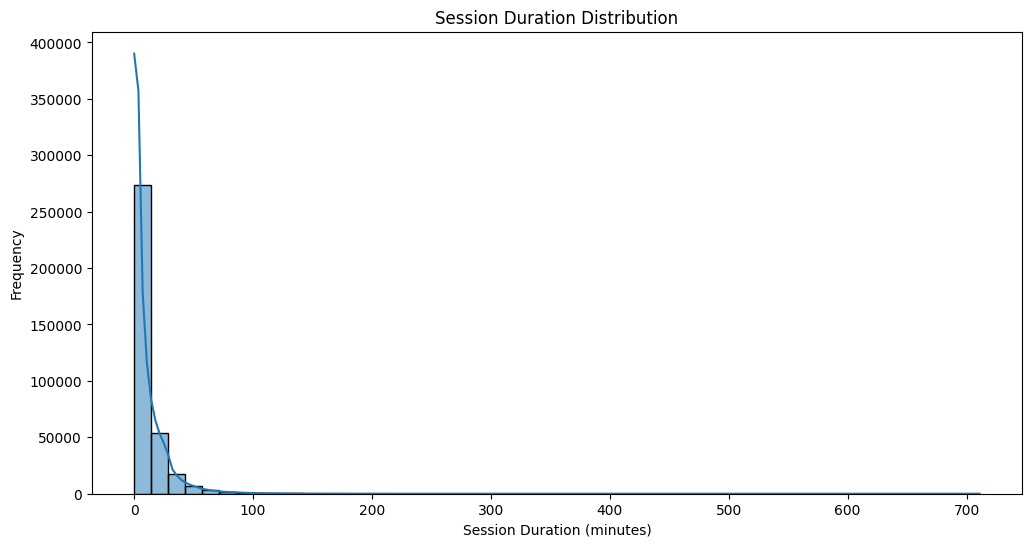

___________________________________________________________________________


count    359398.000000
mean         10.717371
std          16.618420
min           0.000000
25%           2.000000
50%           5.000000
75%          14.000000
max         711.000000
Name: session_duration, dtype: float64

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(visitsdf['session_duration'], bins=50, kde=True)
plt.title('Session Duration Distribution')
plt.xlabel('Session Duration (minutes)')
plt.ylabel('Frequency')
plt.show()

print('_'*75)
visitsdf['session_duration'].describe()

As expected, the majority of sessions have pretty short durations, with a very high peak around the 0-10 minute range. There are a few sessions with much longer durations extending beyond 100 minutes, but these are rare.

The high frequency of short sessions, combined with the increasing number of users and sessions per day, suggests that while the platform is attracting more users and sessions over time, the majority of these sessions are brief. This could indicate quick visits or high churn rate. We'll inspect that further.

The spikes in the previous graphs might include both new and returning users, contributing to the overall engagement but primarily with short session durations. We will need to inspect that more deeply with cohort analysis.

When the average session length starts to decrease, it's important to develop hypotheses about the reason. For example, perhaps the mobile version of the platform is difficult to use, causing sessions on smartphones and tablets to end very quickly.

### Sticky Factor

It's important to note that these metrics, by themselves, do not help the company make business decisions. They also do not give an idea of how users will react to changes. Of course, they play an important role in team motivation. For this reason, they are sometimes called vanity metrics.

What I can do is calculate the sticky factor, a metric that tells me how loyal the audience is and how often they return to the application.

In [ ]:
sticky_wau = dau_total/wau_total*100
sticky_mau = dau_total/mau_total*100

print(sticky_wau)
print(sticky_mau)

uid    15.884409
dtype: float64
uid    3.90897
dtype: float64


With a sticky WAU of about 15.88% and a sticky MAU of about 3.90%, it appears that a relatively small portion of the user base is highly engaged on a daily basis. This suggests that <b>while the platform has a significant number of users, their daily engagement isn't as strong as it could be.</b> Although improving daily engagement depends totally on the service they are selling.

### User Activity Heatmap

Perhaps Y.Afisha's service doesn't make sense to have massive numbers of users engaging daily on the platform. This is a conclusion we could draw by taking a look at user activity during the day:

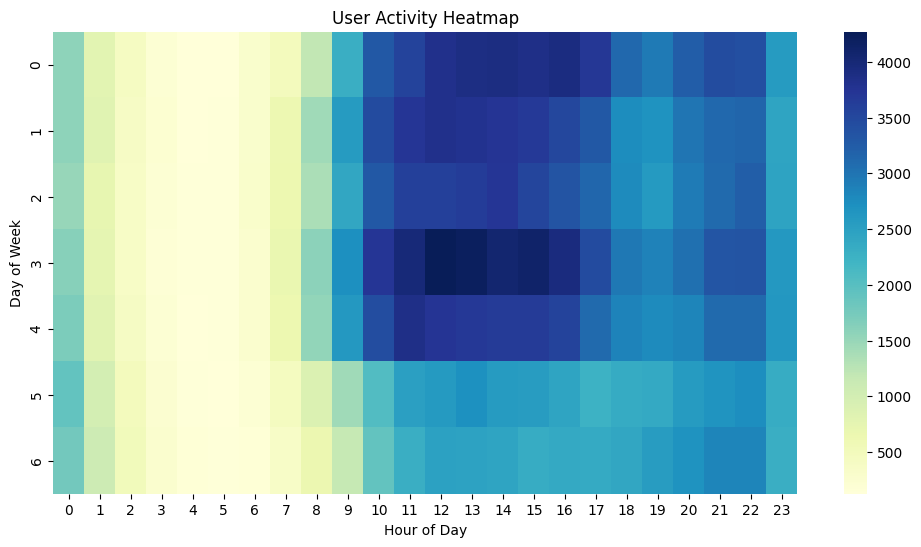

In [ ]:
visitsdf['hour'] = visitsdf['start_ts'].dt.hour
visitsdf['day'] = visitsdf['start_ts'].dt.dayofweek
activity_heatmap = visitsdf.groupby(['day', 'hour']).size().unstack().fillna(0)
plt.figure(figsize=(12, 6))
sns.heatmap(activity_heatmap, cmap='YlGnBu')
plt.title('User Activity Heatmap')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.show()

User activity is highest around midday (10 AM to 2 PM) on weekdays, particularly midweek (Tuesday, Wednesday, and Thursday). Consistent activity throughout the late morning and early afternoon indicates that users are most active during typical working hours, suggesting that they engage with the platform primarily during breaks or non-work-related periods. This pattern could imply that users might be using the platform for leisure or personal interests rather than work-related tasks. The consistent activity throughout the day suggests a regular user base.

Activity is significantly lower in the early morning hours (midnight to 6 AM) across all days. Or course, the low activity during early mornings aligns with expected sleeping hours.

## Cohort Analysis

The analysis of the user activity on our platform reveals several key insights:

* It seems the number of users and sessions per day is, apparently, increasing, but we cannot conclude that this is an indication of growing engagement with our platform.

* What's more, the session and daily activity analyses we've done shows that the majority of sessions are relatively short, with a significant peak in the 0-10 minute range and a long tail of infrequent longer sessions.

Given these findings, it is crucial to perform a <b>cohort analysis</b> to understand user behavior more deeply. Here are the reasons why:

* By segmenting users based on their sign-up date and tracking their activity over time, we can identify patterns in user <b>retention</b> and <b>churn</b>. Understanding how long new users stay engaged and when they drop off will help us address retention issues.

* Cohort analysis allows us to see how different groups of users interact with the platform over their lifecycle. This can help us determine if certain cohorts (e.g., users who signed up during a particular period) have higher engagement levels or longer session durations compared to others.

In a nutshell, cohort analysis is essential for gaining a deeper understanding of user behavior, improving retention, and optimizing our platform and marketing strategies. By leveraging this analysis, we can make data-driven decisions to enhance user experience and drive sustainable growth.

### Cohort by Users and First Orders

Let's start by grouping the data by the 'uid' column using the groupby() method. 

For each customer, we get the date of their first order so we have a Series object with the name "order_date". The problem is that the original dataframe already has a column named like that. To avoid having two columns with the same name in the resulting DataFrame, we will rename the Series object to `first_order_date`.

Finally, using the join() method, we will join the ordersdf DataFrame with the first_order_date_by_customers Series by the 'uid' column:

In [ ]:
first_order_date_by_customers = ordersdf.groupby('uid')['buy_ts'].min()
first_order_date_by_customers.name = 'first_order_date'

ordersdf = ordersdf.join(first_order_date_by_customers, on='uid')
print(ordersdf.head(10))

                    uid              buy_ts  revenue    first_order_date
0  10329302124590727494 2017-06-01 00:10:00    17.00 2017-06-01 00:10:00
1  11627257723692907447 2017-06-01 00:25:00     0.55 2017-06-01 00:25:00
2  17903680561304213844 2017-06-01 00:27:00     0.37 2017-06-01 00:27:00
3  16109239769442553005 2017-06-01 00:29:00     0.55 2017-06-01 00:29:00
4  14200605875248379450 2017-06-01 07:58:00     0.37 2017-06-01 07:58:00
5  10402394430196413321 2017-06-01 08:43:00     0.18 2017-06-01 08:43:00
6  12464626743129688638 2017-06-01 08:54:00     1.83 2017-06-01 08:54:00
7   3644482766749211722 2017-06-01 09:22:00     1.22 2017-06-01 09:22:00
8  17542070709969841479 2017-06-01 09:22:00     3.30 2017-06-01 09:22:00
9   1074355127080856382 2017-06-01 09:23:00     0.37 2017-06-01 09:23:00


Alright, now our table has a `first_order_date` column with the date of the customers' first purchases. The next step will be to extract the months from the first_order_date and buy_ts columns.

In [ ]:
ordersdf['first_order_month'] = ordersdf['first_order_date'].dt.to_period('M')
ordersdf['order_month'] = ordersdf['buy_ts'].dt.to_period('M')

print(ordersdf.sample(10))


                        uid              buy_ts  revenue    first_order_date  \
26696  15241034471419492416 2017-12-28 14:25:00     8.55 2017-12-28 14:25:00   
23618  12651954388276572816 2017-12-12 16:20:00     1.82 2017-12-12 12:32:00   
12791  17189273328458342073 2017-10-14 21:53:00     0.85 2017-10-14 21:53:00   
12024   4472814665236385582 2017-10-10 16:42:00     2.20 2017-10-10 16:42:00   
18771   5658619257902477762 2017-11-21 22:20:00     1.34 2017-09-13 21:00:00   
28167   4870373221956410761 2018-01-05 11:57:00     1.95 2017-11-24 08:21:00   
17653   9441276109446867129 2017-11-15 14:54:00     4.89 2017-11-15 14:54:00   
7629    3501596628378158474 2017-09-13 11:05:00     5.50 2017-07-03 14:25:00   
47813    970975784987511180 2018-05-18 10:15:00     0.49 2017-11-04 14:03:00   
36231   2520714564827308021 2018-02-21 18:34:00     0.92 2018-02-20 18:54:00   

      first_order_month order_month  
26696           2017-12     2017-12  
23618           2017-12     2017-12  
12791

The first_order_month column will be used to form cohorts.

Let's group the data by this column so we can evaluate the metrics for each cohort further. We will apply agg method and pass a dictionary to it where the keys are column names and the values are aggregation functions.

In [ ]:
cohort_grouped_users = ordersdf.groupby('first_order_month').agg({'uid': 'nunique', 'revenue': 'sum'})
print(cohort_grouped_users.head(20))

                    uid   revenue
first_order_month                
2017-06            2022  20384.23
2017-07            1919  14780.53
2017-08            1369  11296.43
2017-09            2578  20574.25
2017-10            4335  25418.85
2017-11            4081  24544.52
2017-12            4380  22732.06
2018-01            3372  15952.78
2018-02            3651  16568.40
2018-03            3531  17139.18
2018-04            2274  11075.75
2018-05            2979  12382.35


Here's our first observations from the table grouped by cohorts based on the month of users' first purchases:

* We notice significant variations in the number of unique users (uid) across different cohorts. For instance, the cohort from June 2017 had over 2,000 unique users, while the December 2017 cohort had twice. This suggests fluctuations in user acquisition over time, suggesting stationality.

* Revenue also varies widely between cohorts. The highest revenue was generated by the September 2017 cohort, contributing $34,676.32, whereas the prior month cohort has the lowest revenue. It's essential to consider seasonal influences, as evidenced by higher revenues towards the end of the year, such as in November and December 2017.

* Over time, there appears to be a trend of decreasing revenue, particularly noticeable from early 2018 onwards. This trend might reflect changes in user behavior, market dynamics, or the effectiveness of marketing efforts.

* Cohorts with larger initial user bases generally tended to generate higher revenue. This correlation underscores the potential impact of a larger user base on revenue outcomes.

Let's clarify that these cohorts of users are based on the date of their <b>first purchase</b>. In the next section we will try to find out how the behavior of each cohort changes over time in order to get specific analysis such as the changes in average purchase over the months or if customers attracted at different times are equally profitable.

Alright, let's create a pivot table in order to appreciate the evolution of this cohort over time:

In [ ]:
ordersdf.pivot_table(
    index='first_order_month',
    columns='order_month',
    values='uid',
    aggfunc='nunique',
).cumsum(axis = 1)

order_month,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05
first_order_month,,,,,,,,,,,,
2017-06,2022.0,2082.0,2132.0,2186.0,2274.0,2341.0,2403.0,2449.0,2507.0,2552.0,2596.0,2649.0
2017-07,NaN,1919.0,1971.0,2028.0,2091.0,2139.0,2176.0,2212.0,2251.0,2293.0,2314.0,2339.0
2017-08,NaN,NaN,1369.0,1426.0,1479.0,1523.0,1562.0,1594.0,1624.0,1668.0,1686.0,1716.0
2017-09,NaN,NaN,NaN,2578.0,2707.0,2807.0,2882.0,2933.0,2996.0,3060.0,3097.0,3139.0
2017-10,NaN,NaN,NaN,NaN,4335.0,4539.0,4661.0,4751.0,4843.0,4913.0,4969.0,5035.0
2017-11,NaN,NaN,NaN,NaN,NaN,4081.0,4305.0,4425.0,4531.0,4613.0,4661.0,4723.0
2017-12,NaN,NaN,NaN,NaN,NaN,NaN,4380.0,4525.0,4627.0,4723.0,4772.0,4834.0
2018-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3372.0,3487.0,3570.0,3612.0,3656.0
2018-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3651.0,3769.0,3827.0,3866.0


Here's some key observations:

* Across all cohorts, there is a noticeable decrease in the number of active users. This indicates that retention of customers drops over time after their initial purchase. Actually, the largest numbers in each row are situated typically in the first column for each cohort.

* While there is generally a decline in active users, some cohorts show slight fluctuations or minor increases in certain months. For example, in the October 2017 cohort, there's a significant increase in active users in subsequent months before declining again.

In summary, this user cohort analysis reveals that while initial customer acquisition can be strong, retaining customers beyond the first month is challenging, and efforts should focus on retaining and engaging customers beyond their initial purchase to maximize their lifetime value.

Let's calculate additional cohort metrics so we appreciate how <b>average revenue per user</b> (total sales divided by the number of customers) changes over time. This will give us an idea of whether the average revenue of users who continue to place orders is increasing or not.

First, we will group the data by cohorts based on first_order_month and by purchase month (order_month):

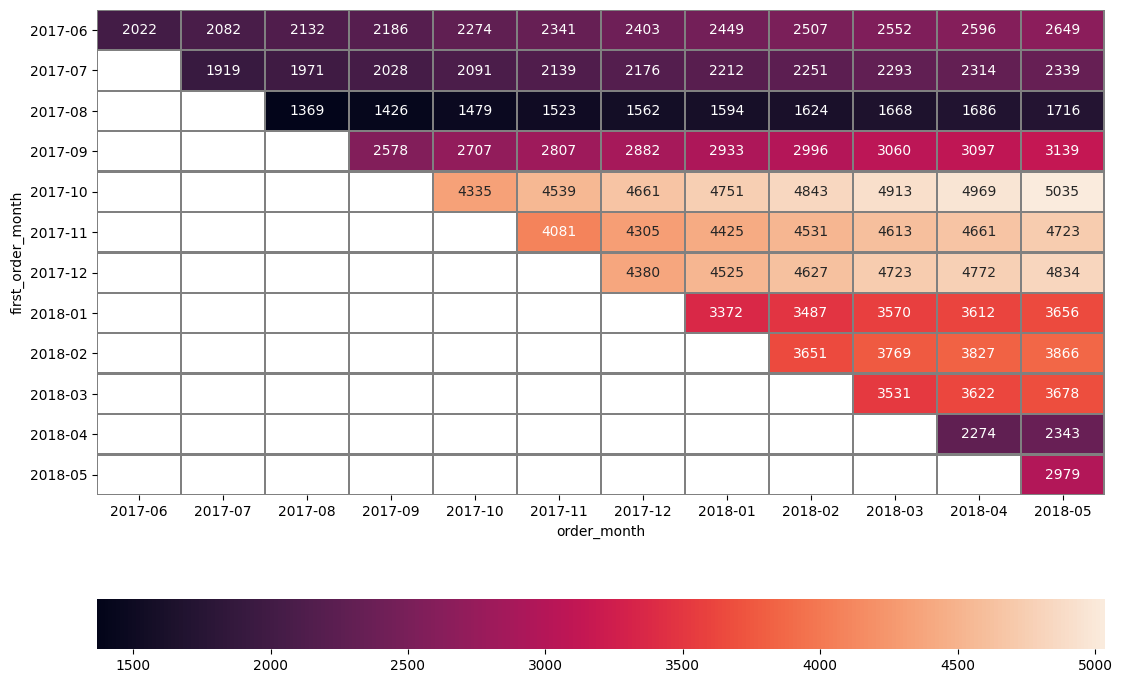

In [ ]:
compras_acumuladas = ordersdf.pivot_table(
    index='first_order_month',
    columns='order_month',
    values='uid',
    aggfunc='nunique',
).cumsum(axis = 1)


plt.figure(figsize=(13, 9))
sns.heatmap(compras_acumuladas, 
            annot=True, 
            fmt='.0f', 
            linewidths=1, 
            linecolor='grey', 
            cbar_kws= {'orientation': 'horizontal'} 
            )
plt.show()

In [ ]:
cohort_grouped_orders = ordersdf.groupby(['first_order_month', 'order_month']).agg({'revenue': 'sum', 'uid': 'nunique'})

# We will also find "revenue_per_user":
cohort_grouped_orders['revenue_per_user'] = (cohort_grouped_orders['revenue'] / cohort_grouped_orders['uid'])

print(cohort_grouped_orders.head(23))

                                revenue   uid  revenue_per_user
first_order_month order_month                                  
2017-06           2017-06       8881.60  2022          4.392483
                  2017-07        908.49    60         15.141500
                  2017-08        885.34    50         17.706800
                  2017-09       1447.31    54         26.802037
                  2017-10       1697.13    88         19.285568
                  2017-11       1237.37    67         18.468209
                  2017-12       1378.02    62         22.226129
                  2018-01        932.12    46         20.263478
                  2018-02       1119.15    58         19.295690
                  2018-03        884.85    45         19.663333
                  2018-04        600.78    44         13.654091
                  2018-05        412.07    53          7.774906
2017-07           2017-07      10919.65  1919          5.690281
                  2017-08        644.61 

Now we will create a pivot table that shows changes in revenue per user for the cohorts by order month and evaluate changes in revenue per user over time.

In [ ]:
cohort_grouped_orders.pivot_table(
    index='first_order_month',
    columns='order_month',
    values='revenue_per_user',
    aggfunc='mean',
)

order_month,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05
first_order_month,,,,,,,,,,,,
2017-06,4.392483,15.141500,17.706800,26.802037,19.285568,18.468209,22.226129,20.263478,19.295690,19.663333,13.654091,7.774906
2017-07,NaN,5.690281,12.396346,13.659825,8.936825,7.065000,7.816216,6.421111,6.992821,7.382143,6.490476,11.843600
2017-08,NaN,NaN,5.226808,10.990526,11.851321,12.182955,16.978974,12.139063,9.620333,10.388182,20.543333,6.140000
2017-09,NaN,NaN,NaN,4.889709,15.497054,11.783000,22.490267,11.919608,15.286190,11.422344,11.230000,9.212381
2017-10,NaN,NaN,NaN,NaN,4.713260,8.782941,6.568197,5.189889,7.139674,5.810857,6.573214,7.500455
2017-11,NaN,NaN,NaN,NaN,NaN,4.815481,6.650982,6.015083,12.510660,8.120488,4.580833,7.564839
2017-12,NaN,NaN,NaN,NaN,NaN,NaN,4.412475,7.061310,8.614020,7.068229,8.635306,6.471290
2018-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.040394,8.653391,10.462892,6.199286,4.650909
2018-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.129874,7.905678,4.942414,6.941026


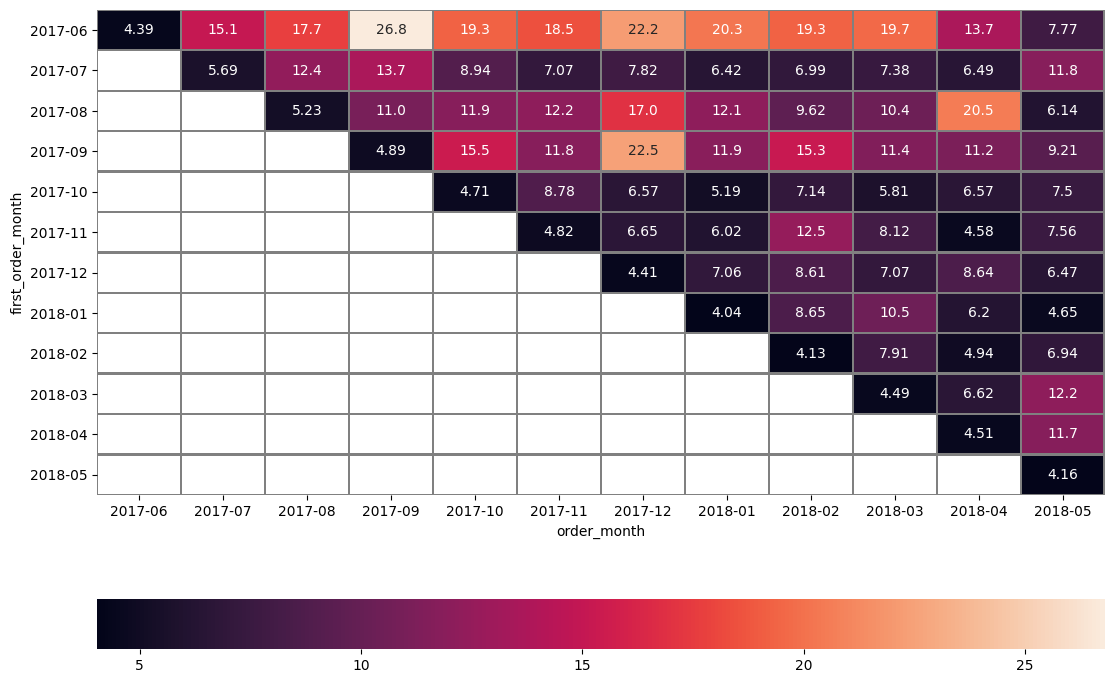

In [ ]:
plt.figure(figsize=(13, 9))
sns.heatmap(
    cohort_grouped_orders.pivot_table(
        index='first_order_month',
        columns='order_month',
        values='revenue_per_user',
        aggfunc='mean',
),
    annot=True, 
    fmt='.3', 
    linewidths=1, 
    linecolor='grey', 
    cbar_kws= {'orientation': 'horizontal'} 
)
plt.show()

But what if we need to evaluate changes in revenue per user relative to the time elapsed since their first purchase?

Then we will need the <b>Customer Lifetime</B> metric, that shows in which month an event occurred relative to the distance from the cohort month. 

Let's find the cohort lifetime. We will subtract the cohort month (first_order_month) from the purchase month (order_month).

In [ ]:
cohort_grouped_orders = cohort_grouped_orders.reset_index()
cohort_grouped_orders['cohort_lifetime'] = (cohort_grouped_orders['order_month'] - cohort_grouped_orders['first_order_month'])
cohort_grouped_orders['cohort_lifetime'].head()

0    <0 * MonthEnds>
1         <MonthEnd>
2    <2 * MonthEnds>
3    <3 * MonthEnds>
4    <4 * MonthEnds>
Name: cohort_lifetime, dtype: object

Alright, we didn't get the results we wanted. We need to adjust the code to timestaps (instead of periods) to ensure that the subtraction operation behaves as expected and yields a timedelta result. Once we subtract these columns, we get a timedelta64 result:

In [ ]:
cohort_grouped_orders['first_order_month'] = cohort_grouped_orders['first_order_month'].dt.to_timestamp()
cohort_grouped_orders['order_month'] = cohort_grouped_orders['order_month'].dt.to_timestamp()

# Let's try again
cohort_grouped_orders = cohort_grouped_orders.reset_index()
cohort_grouped_orders['cohort_lifetime'] = (cohort_grouped_orders['order_month'] - cohort_grouped_orders['first_order_month'])
cohort_grouped_orders['cohort_lifetime'].head()

0     0 days
1    30 days
2    61 days
3    92 days
4   122 days
Name: cohort_lifetime, dtype: timedelta64[ns]

Alright, let's continue.

We will convert this type to the number of months between the two dates. We need to divide cohort_lifetime by the constant value np.timedelta64(1, 'M') and find out how many values equal to one month are contained in cohort_lifetime.

In [ ]:
cohort_grouped_orders['cohort_lifetime'] = cohort_grouped_orders['cohort_lifetime'] / np.timedelta64(1, 'M')
print(cohort_grouped_orders['cohort_lifetime'].head())

0    0.000000
1    0.985647
2    2.004148
3    3.022649
4    4.008296
Name: cohort_lifetime, dtype: float64


We get fractions as a result because the constant value np.timedelta64(1, 'M') represents the average duration of months in a year. Months have varying lengths of 28 to 31 days, hence the fractions. Let's round the values in the cohort_lifetime column using the round() method, and then convert them to integers using the astype('int') method:

In [ ]:
cohort_grouped_orders['cohort_lifetime'] = (cohort_grouped_orders['cohort_lifetime'].round().astype('int'))
print(cohort_grouped_orders[['first_order_month', 'order_month', 'cohort_lifetime']].head())

  first_order_month order_month  cohort_lifetime
0        2017-06-01  2017-06-01                0
1        2017-06-01  2017-07-01                1
2        2017-06-01  2017-08-01                2
3        2017-06-01  2017-09-01                3
4        2017-06-01  2017-10-01                4


Now we have integers representing months. They indicate the number of months elapsed since the cohort month to the purchase month.

After performing all calculations, we will keep only the year and month in the cohort identifier. We will use the dt.strftime() method, which converts datetime Series objects to strings formatted as dates.

For example:

In [ ]:
cohort_grouped_orders['first_order_month'].dt.strftime('%d.%m.%Y')

0     01.06.2017
1     01.06.2017
2     01.06.2017
3     01.06.2017
4     01.06.2017
         ...    
73    01.03.2018
74    01.03.2018
75    01.04.2018
76    01.04.2018
77    01.05.2018
Name: first_order_month, Length: 78, dtype: object

Let's keep only the year and month in the data for the month of the first purchase:

In [ ]:
cohort_grouped_orders['first_order_month'] = cohort_grouped_orders['first_order_month'].dt.strftime('%Y-%m')

Now let's create a pivot table showing changes in average revenue per user, where the columns represent the customer lifetime and the rows represent cohorts:

In [ ]:
revenue_per_user_pivot = cohort_grouped_orders.pivot_table(
    index='first_order_month',
    columns='cohort_lifetime',
    values='revenue_per_user',
    aggfunc='mean',
)
print(revenue_per_user_pivot)

cohort_lifetime          0          1          2          3          4   \
first_order_month                                                         
2017-06            4.392483  15.141500  17.706800  26.802037  19.285568   
2017-07            5.690281  12.396346  13.659825   8.936825   7.065000   
2017-08            5.226808  10.990526  11.851321  12.182955  16.978974   
2017-09            4.889709  15.497054  11.783000  22.490267  11.919608   
2017-10            4.713260   8.782941   6.568197   5.189889   7.139674   
2017-11            4.815481   6.650982   6.015083  12.510660   8.120488   
2017-12            4.412475   7.061310   8.614020   7.068229   8.635306   
2018-01            4.040394   8.653391  10.462892   6.199286   4.650909   
2018-02            4.129874   7.905678   4.942414   6.941026        NaN   
2018-03            4.490283   6.615055  12.178929        NaN        NaN   
2018-04            4.514560  11.733913        NaN        NaN        NaN   
2018-05            4.1565

It's still challenging to draw conclusions from the pivot table showing changes in average revenue per user. The values appear monotonous and uniform; nothing really stands out. But if we convert the table into a heatmap by adding colors, trends and patterns will become more apparent.

### Average Customer Purchase Size Visualization

The next cohort analysis heatmap provides insights into the purchasing behavior of customers based on the month they made their first purchase and how their average purchase size evolved over time:

<AxesSubplot:title={'center':'Average Customer Purchase Size'}, xlabel='cohort_lifetime', ylabel='first_order_month'>

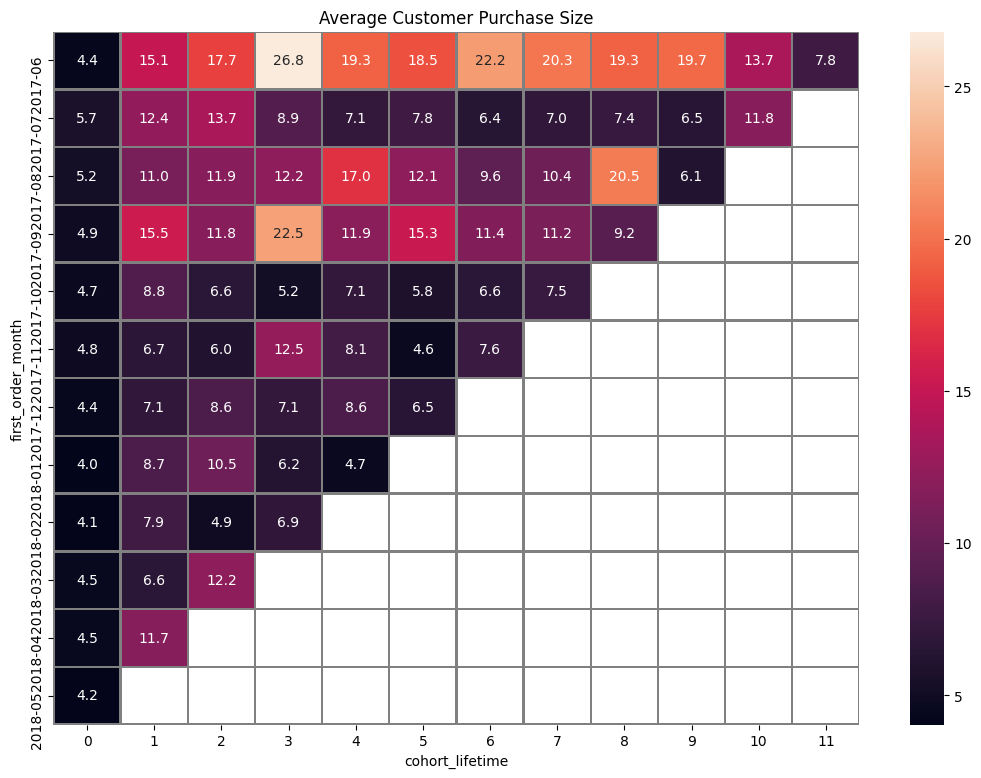

In [ ]:
plt.figure(figsize=(13, 9))
plt.title('Average Customer Purchase Size')
sns.heatmap(
    revenue_per_user_pivot,
    annot=True,
    fmt='.1f',
    linewidths=1,
    linecolor='gray',
)

Here are the key observations:

* Most cohorts exhibit a decline in average purchase size over time. For example, the June 2017 cohort started with 4.4 units and peaked at 26.8 units in the second month (which is the highest average purchase size observed), followed by a gradual decline.
* The trend of declining purchase size over time suggests that customers tend to make larger purchases initially and then reduce their purchase size.
* Other notable peaks include 22.5 units for the September 2017 cohort in their second month and 20.5 units for the August 2017 cohort in their fourth month.
* The heatmap shows that later months (cohort lifetime 6-11) generally have lower average purchase sizes, indicating a decline in customer engagement or smaller, more frequent purchases.
* Some cohorts show more consistent purchasing behavior, such as the November and December 2017 cohorts, which maintains relatively steady purchase sizes over the observed period. But there are also significant drop-offs in average purchase size, which are evident after certain months. For example, the July 2017 cohort's average purchase size drops from 7.8 units in the fifth month to 6.5 units in the sixth month.
* The data suggests potential seasonal influences on purchasing behavior, with higher purchase sizes observed during certain months.

In summary, the heatmap reveals that customers tend to start with larger purchases that decrease over time, with some variability across different cohorts. There are peaks and drop-offs that highlight key points of customer engagement and disengagement. These observations suggest the importance of focusing on strategies to maintain user spending over time and understanding the reasons behind the revenue spikes for specific cohorts.

### Retention Rate

To ensure sustainable growth and improve user engagement, it's crucial to conduct a retention rate analysis. This analysis will allow us to understand when users leave, identify changes that enhance retention, and ensure that our marketing efforts result in long-term engagement. 

By increasing user lifetime value through better retention, we can inform other areas from the company (such as product) to prioritize features that boost satisfaction and retention. 

Ultimately, retention rate analysis empowers us to make data-driven decisions that foster loyalty, optimize our platform, and drive sustainable growth.

Alright, so we're going to define the event and time period to create cohorts. We'll take the date when the user was active for the first time. Then, we're going to save this information in the `first_activity_date` series and join it with the Visits Dataframe.

We've decided to create monthly cohorts since weekly ones would result in an unreadable graphic. Furthermore, by calculating Activity Month, we will determine the month in which each user is active (`activity_month`) and the month they are first active (`first_activity_month`). This will help us group users by the month they first engage with the service.

Here's the model so far:

In [ ]:
first_activity_date = visitsdf.groupby(['uid'])['start_ts'].min()
first_activity_date.name = 'first_activity_date'
visitsdf = visitsdf.join(first_activity_date, on='uid')

visitsdf['activity_month'] = visitsdf['start_ts'].dt.to_period('M')
visitsdf['first_activity_month'] = visitsdf['first_activity_date'].dt.to_period('M')

visitsdf

,uid,device,start_ts,end_ts,source_id,session_year,session_month,session_week,session_date,date,session_end_ts,session_duration,hour,day,first_activity_date,activity_month,first_activity_month
0,16879256277535980062,touch,2017-12-20 17:20:00,2017-12-20 17:38:00,4,2017,12,51,2017-12-20,2017-12-20,2017-12-20 17:38:00,18.000000,17,2,2017-12-20 17:20:00,2017-12,2017-12
1,104060357244891740,desktop,2018-02-19 16:53:00,2018-02-19 17:21:00,2,2018,2,8,2018-02-19,2018-02-19,2018-02-19 17:21:00,28.000000,16,0,2018-02-19 16:53:00,2018-02,2018-02
2,7459035603376831527,touch,2017-07-01 01:54:00,2017-07-01 01:54:00,5,2017,7,26,2017-07-01,2017-07-01,2017-07-01 01:54:00,0.000000,1,5,2017-07-01 01:54:00,2017-07,2017-07
3,16174680259334210214,desktop,2018-05-20 10:59:00,2018-05-20 11:23:00,9,2018,5,20,2018-05-20,2018-05-20,2018-05-20 11:23:00,24.000000,10,6,2018-03-09 20:05:00,2018-05,2018-03
4,9969694820036681168,desktop,2017-12-27 14:06:00,2017-12-27 14:06:00,3,2017,12,52,2017-12-27,2017-12-27,2017-12-27 14:06:00,0.000000,14,2,2017-12-27 14:06:00,2017-12,2017-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359395,18363291481961487539,desktop,2017-07-29 19:07:00,2017-07-29 19:07:19,2,2017,7,30,2017-07-29,2017-07-29,2017-07-29 19:07:19,0.316667,19,5,2017-07-29 19:07:00,2017-07,2017-07
359396,18370831553019119586,touch,2018-01-25 17:38:00,2018-01-25 17:38:19,1,2018,1,4,2018-01-25,2018-01-25,2018-01-25 17:38:19,0.316667,17,3,2018-01-25 17:38:00,2018-01,2018-01
359397,18387297585500748294,desktop,2018-03-03 10:12:00,2018-03-03 10:12:19,4,2018,3,9,2018-03-03,2018-03-03,2018-03-03 10:12:19,0.316667,10,5,2018-03-03 10:12:00,2018-03,2018-03
359398,18388616944624776485,desktop,2017-11-02 10:12:00,2017-11-02 10:12:19,5,2017,11,44,2017-11-02,2017-11-02,2017-11-02 10:12:19,0.316667,10,3,2017-11-02 10:12:00,2017-11,2017-11


In the next process, we will analyze user retention by creating monthly cohorts. Here’s a breakdown of what we will do and why:

- Calculate Cohort Lifetime in Months: We will compute how many months each user has been active since their first activity. This measure, `cohort_lifetime`, will allow us to track user retention over time.

- Group by Monthly Cohorts: We will group the users by their first_activity_month and cohort_lifetime, and calculate the number of unique users (uid) in each group.

- Calculate Retention Rate: We will find the initial number of users for each cohort and then calculate the retention rate by dividing the number of active users in subsequent months by the initial number of users.

This approach will help us understand how user engagement changes over time and identify trends in user retention.

In [ ]:
# 1.- Calculate cohort lifetime in months:

visitsdf['cohort_lifetime'] = (visitsdf['activity_month'] - visitsdf['first_activity_month']).apply(lambda x: x.n)

# 2.- Group by monthly cohorts:

visit_cohorts = (
    visitsdf.groupby(['first_activity_month', 'cohort_lifetime'])
    .agg({'uid': 'nunique'})
    .reset_index()
)

initial_users_count = visit_cohorts[visit_cohorts['cohort_lifetime'] == 0][['first_activity_month', 'uid']]
initial_users_count = initial_users_count.rename(columns={'uid': 'cohort_users'})

visit_cohorts = visit_cohorts.merge(initial_users_count, on='first_activity_month')
visit_cohorts['retention'] = visit_cohorts['uid'] / visit_cohorts['cohort_users']

# 3.- Calculate retention rate

retention_pivot = visit_cohorts.pivot_table(
    index='first_activity_month',
    columns='cohort_lifetime',
    values='retention',
    aggfunc='sum',
)

Now it's time to create a heatmap.

We will set the <b>vmin</b> and <b>vmax</b> parameters to highlight small differences in retention rates. 

By setting vmin=0 and vmax=0.1, we force the color scale to focus on the 0-10% range. This adjustment makes differences in lower retention rates more apparent. The vmax value can be adjusted to fit the range of the data as needed, ensuring that the heatmap effectively displays the variations in user retention.

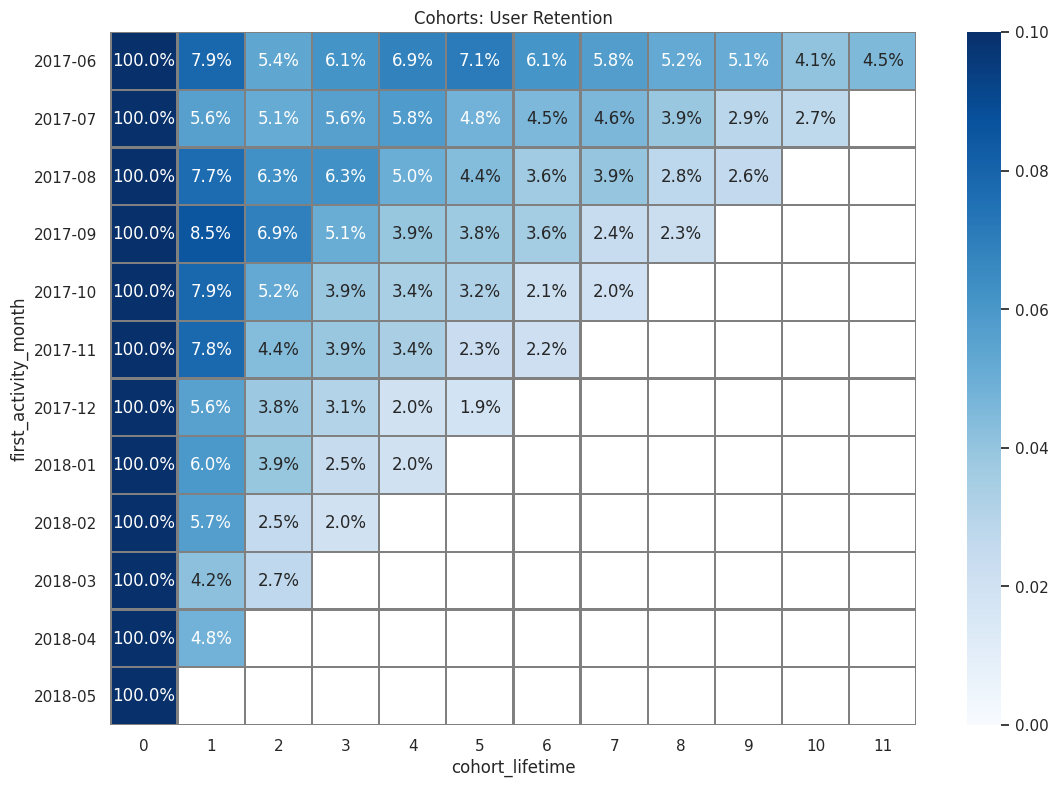

In [ ]:
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Cohorts: User Retention')

ax = sns.heatmap(retention_pivot, annot=True, fmt='.1%', linewidths=1, linecolor='gray', cmap='Blues', vmin=0, vmax=0.1)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

plt.show()


Here are the key observations from the cohort analysis heatmap of user retention:

* There is a significant drop in user retention after the first month across all cohorts. For example, the June 2017 cohort drops from 100% to 7.9% in the first month.
* After the initial drop, user retention continues to decline gradually over the following months. Most cohorts retain only a small percentage of their initial users after several months. Long-term retention is relatively low for all cohorts, with most cohorts retaining less than 5% of users after six months.
* The September 2017 cohort shows a slightly better retention in the early months compared to other cohorts, starting at 8.5% in the first month and then declining.

The overall retention rates are low. The consistent decline in retention across cohorts indicates a challenge in maintaining long-term user engagement. The early significant drop-off suggests that users might not find enough value or face barriers after their initial interaction. 

Improving the onboarding experience, increasing engagement through personalized content, and addressing potential pain points early on could help improve retention rates.

### Cancel Rate

Now it's turn to analyze Cancel Rates.

It's easy to find the churn rate: we just need to compare the number of users from one period to the next. We can use the pct_change() method for this. pct_change() calculates the percentage change in a column compared to the previous row. When applied with grouping, it operates within each group.

For cohorts, pct_change() can help us compare the number of users across previous lifecycle stages.

Next, we'll create a pivot table and visualize the results using a heatmap.

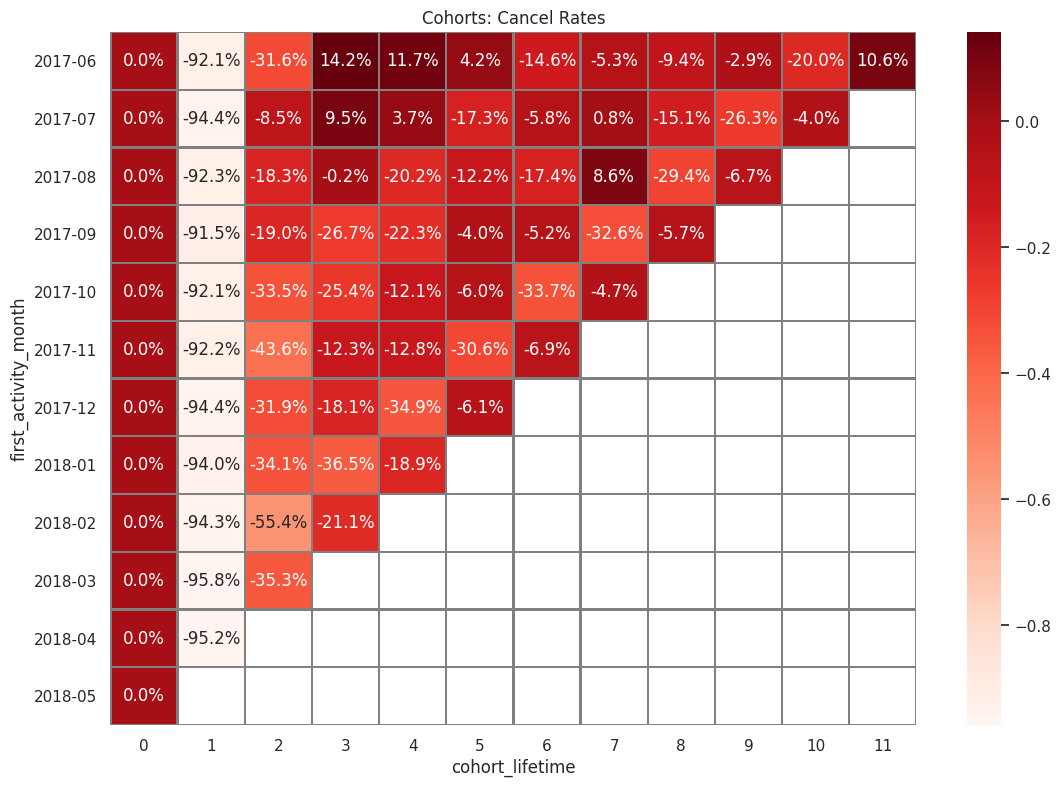

In [ ]:
visit_cohorts['churn_rate'] = visit_cohorts.groupby(['first_activity_month'])['uid'].pct_change()

churn_pivot = visit_cohorts.pivot_table(
    index='first_activity_month',
    columns='cohort_lifetime',
    values='churn_rate',
    aggfunc='sum',
)

sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Cohorts: Cancel Rates')

ax = sns.heatmap(churn_pivot, annot=True, fmt='.1%', linewidths=1, linecolor='gray', cmap='Reds')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

plt.show()

Here are the key observations from the cohort cancel rate analysis heatmap:

* There is a significant initial cancel rate in the first month for all cohorts, with rates around -92% to -95%.
* The cancel rates vary month-to-month. For example, the June 2017 cohort shows a high cancel rate initially, then fluctuates between positive and negative values, indicating inconsistent user behavior.
* Several cohorts experience negative cancel rates, particularly in the earlier months, suggesting periods of re-engagement or account reactivation.
* The pattern of high initial cancel rates followed by fluctuations is consistent across all cohorts, indicating a common trend in user behavior regardless of the cohort start date.
* Despite the high initial cancel rates, there is a general trend of decreasing cancel rates over time. However, certain months exhibit spikes in cancellations, indicating potential issues or seasonal effects that may need to be addressed.

The high initial cancel rates followed by fluctuating values indicate challenges in retaining users after their first month. The negative cancel rates suggest some users are re-engaging or reactivating their accounts, which is a positive sign. 

However, the overall trend points to a need for better initial engagement strategies and continuous value delivery to reduce the early drop-off and stabilize user retention.

Alright, it's time to calculate <b>LTV</b> (Lifetime Value) and <b>CAC</b> (Customer Adquisition Cost)

### Life Time Value

In [ ]:
# Calculating the number of new customers (n_buyers) for each month:
cohort_sizes = ordersdf.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index()
cohort_sizes.columns = ['first_order_month', 'n_buyers']

cohort_sizes.head()

,first_order_month,n_buyers
0,2017-06,2022
1,2017-07,1919
2,2017-08,1369
3,2017-09,2578
4,2017-10,4335


Now we're going to group the orders table by month of the first purchase and month of purchase, and totalize the revenues. We'll set the default index using the `reset_index()` method.

In [ ]:
cohortsorders = ordersdf.groupby(['first_order_month','order_month']).agg({'revenue': 'sum'}).reset_index()
cohortsorders.head()

,first_order_month,order_month,revenue
0,2017-06,2017-06,8881.60
1,2017-06,2017-07,908.49
2,2017-06,2017-08,885.34
3,2017-06,2017-09,1447.31
4,2017-06,2017-10,1697.13


The row in the cohort table specifies the revenue generated by the cohort. For example, in row 0, we can see that customers who made their first purchase in June 2017 generated a total revenue of $9557.49 that month.

For cohort analysis, the LTV (Lifetime Value) is the accumulated revenue from a cohort, representing the number of individuals in that cohort. Let's add data on how many users made their first purchases each month to the cohorts table:

In [ ]:
report = pd.merge(cohort_sizes, cohortsorders, on='first_order_month')
report.head()

,first_order_month,n_buyers,order_month,revenue
0,2017-06,2022,2017-06,8881.60
1,2017-06,2022,2017-07,908.49
2,2017-06,2022,2017-08,885.34
3,2017-06,2022,2017-09,1447.31
4,2017-06,2022,2017-10,1697.13


Previously, a column appeared in the table with new customers: n_buyers. The first 12 values ​​of this column are the same because they all refer to the same cohort.

Just two more steps and we'll have the LTV.

Firstly, since LTV is calculated based on gross profit rather than revenue, we need to find the gross profit by multiplying revenue by profitability. Secondly, LTV is a relative parameter and is easier to study for "mature" cohorts, so let's make the columns show the cohort's age instead of the month of the order.

In [ ]:
# Ensure 'order_month' and 'first_order_month' columns are in the correct format
report['order_month'] = report['order_month'].dt.to_timestamp()
report['first_order_month'] = report['first_order_month'].dt.to_timestamp()

# Calculate age in months
report['age'] = ((report['order_month'] - report['first_order_month']) / np.timedelta64(1, 'M')).round().astype('int')

# Calculate gross profit
margin_rate = 0.5
report['gp'] = report['revenue'] * margin_rate

print(report.head())

  first_order_month  n_buyers order_month  revenue  age        gp
0        2017-06-01      2022  2017-06-01  8881.60    0  4440.800
1        2017-06-01      2022  2017-07-01   908.49    1   454.245
2        2017-06-01      2022  2017-08-01   885.34    2   442.670
3        2017-06-01      2022  2017-09-01  1447.31    3   723.655
4        2017-06-01      2022  2017-10-01  1697.13    4   848.565


Now we can finally calculate the LTV. Let's divide the gross profit of each cohort month by the total number of users in each cohort. We'll visualize the cohorts as a pivot table to clarify things.

In [ ]:
report['ltv'] = report['gp'] / report['n_buyers']

output = report.pivot_table(
    index='first_order_month', columns='age', values='ltv', aggfunc='mean'
).cumsum(axis = 1).round(2)

output.fillna('')

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,2.20,2.42,2.64,3.0,3.42,3.72,4.06,4.29,4.57,4.79,4.94,5.04
2017-07-01,2.85,3.01,3.22,3.36,3.45,3.53,3.59,3.66,3.74,3.77,3.85,
2017-08-01,2.61,2.84,3.07,3.27,3.51,3.65,3.76,3.92,4.06,4.13,,
2017-09-01,2.44,2.83,3.06,3.39,3.51,3.69,3.83,3.92,3.99,,,
2017-10-01,2.36,2.56,2.66,2.71,2.79,2.83,2.87,2.93,,,,
2017-11-01,2.41,2.59,2.68,2.84,2.92,2.95,3.01,,,,,
2017-12-01,2.21,2.32,2.42,2.5,2.55,2.59,,,,,,
2018-01-01,2.02,2.17,2.3,2.34,2.37,,,,,,,
2018-02-01,2.06,2.19,2.23,2.27,,,,,,,,


Let's find the LTV of the first cohort by summing the value for each month.

In [ ]:
ltv_201709 = output.loc['2017-09-01'].sum()
ltv_201709

2.0

On average, each customer from the September cohort generated $2 in revenue during their 8 month lifetime.

### Customer Acquisition Cost

To calculate the Customer Acquisition Cost (CAC) for this cohort, let's ensure that 'cost_month' is in string format, as we'll need this datatype for subsequent operations.

In [ ]:
costsdf['cost_month'] = costsdf['dt'].dt.to_period('M')
costsdf['cost_month'] = costsdf['cost_month'].astype(str)

We'll divide the costs of the cohort month by the number of people.

In [ ]:
# Get the necessary cohort
cohort_201706 = report[report['first_order_month'] == '2017-06-01']

# Calculate costs for the cohort month
costs_201706 = costsdf[costsdf['cost_month'] == '2017-06-01']['costs'].sum()

n_buyers_201706 = cohort_201706['n_buyers'][0]
cac_201706 = costs_201706 / n_buyers_201706
ltv_201706 = output.loc['2017-06-01'].sum()

print('CAC =', cac_201706)
print('LTV =', ltv_201706)

CAC = 0.0
LTV = 45.089999999999996


Acquiring each customer cost the company an average of 0.0, while each customer generated 2. Therefore, the investment in customer acquisition is paying off.

Let's calculate for the other cohorts and determine how many months each cohort needs to cover the marketing expenses. We'll calculate the CAC for each cohort. First, we'll find the total expenses for each month, then divide them by the number of customers in each cohort.

In [ ]:
# Calculate monthly costs
monthly_costs = costsdf.groupby('cost_month')['costs'].sum()

monthly_costs.head()

cost_month
2017-06    18015.00
2017-07    18240.59
2017-08    14790.54
2017-09    24368.91
2017-10    36322.88
Name: costs, dtype: float64

Let's add the cost data to the report and calculate the Customer Acquisition Cost (CAC):

In [ ]:
# Ensure 'cost_month' column in 'monthly_costs' is datetime type
monthly_costs.index = pd.to_datetime(monthly_costs.index, format='%Y-%m')

# Convert 'first_order_month' in 'report' to datetime if it's not already
report['first_order_month'] = pd.to_datetime(report['first_order_month'], format='%Y-%m-%d')

# Perform the merge
report_ = pd.merge(report, monthly_costs, left_on='first_order_month', right_on=monthly_costs.index)
report_['cac'] = report_['costs'] / report_['n_buyers']
report_.head()

,first_order_month,n_buyers,order_month,revenue,age,gp,ltv,costs,cac
0,2017-06-01,2022,2017-06-01,8881.60,0,4440.800,2.196241,18015.0,8.909496
1,2017-06-01,2022,2017-07-01,908.49,1,454.245,0.224651,18015.0,8.909496
2,2017-06-01,2022,2017-08-01,885.34,2,442.670,0.218927,18015.0,8.909496
3,2017-06-01,2022,2017-09-01,1447.31,3,723.655,0.357891,18015.0,8.909496
4,2017-06-01,2022,2017-10-01,1697.13,4,848.565,0.419666,18015.0,8.909496


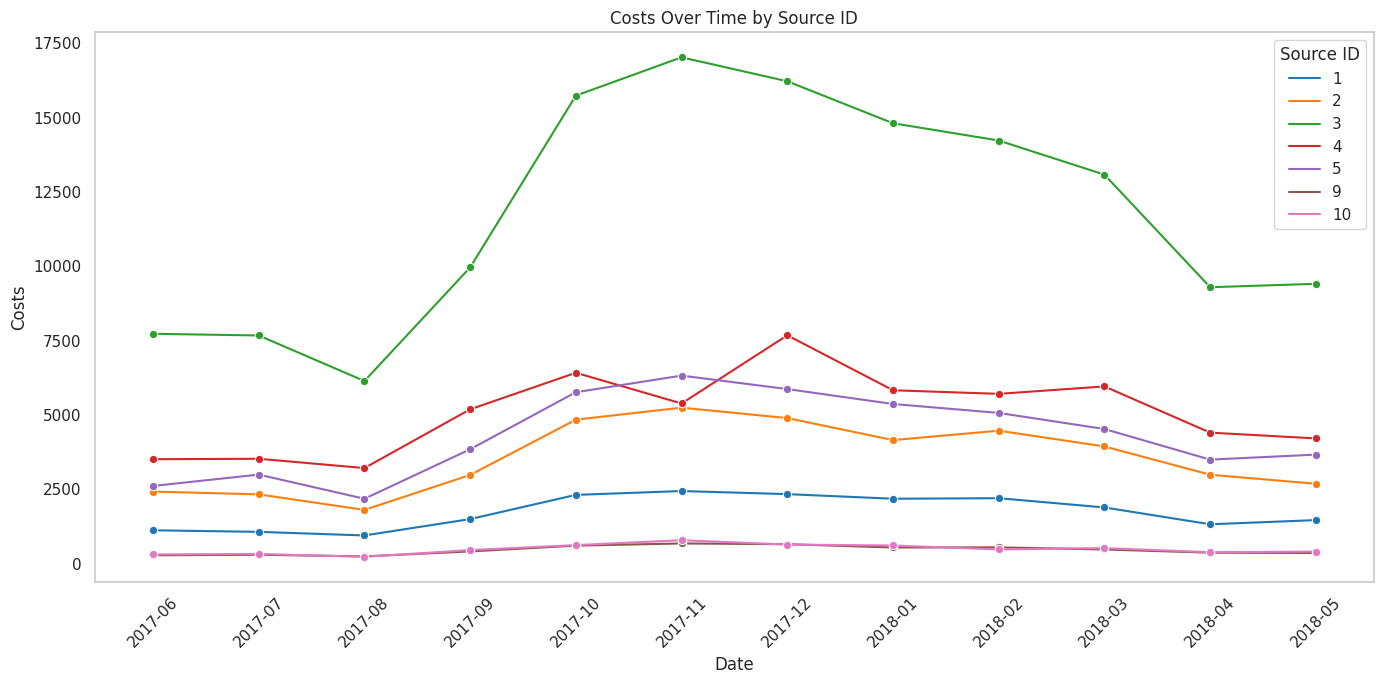

In [ ]:
costs_over_time = costsdf.groupby(['cost_month', 'source_id'])['costs'].sum().reset_index()

palette = sns.color_palette("tab10", n_colors=costs_over_time['source_id'].nunique())

# Plot
plt.figure(figsize=(14, 7))
sns.lineplot(data=costs_over_time, x='cost_month', y='costs', hue='source_id', palette=palette, marker='o')

plt.title('Costs Over Time by Source ID')
plt.xlabel('Date')
plt.ylabel('Costs')
plt.xticks(rotation=45)
plt.legend(title='Source ID')
plt.grid(False)
plt.tight_layout()
plt.show()


Let's get some observations from here:

* As we previously could attest, Source ID 3 (green line) consistently incurs the highest costs over the observed period, with a significant peak in late 2017, while costs for Source IDs 1, 5, 9, and 10 remain relatively stable and lower compared to Source ID 3. Source 4 also incurs in highes costs.
* A noticeable increase in costs across all sources from mid-2017 to early 2018, followed by a decline, suggesting a possible seasonal or campaign-related influence.
* Actually, the peak in costs for Source ID 3 in late 2017 correlates with a high CAC during the same period, indicating an expensive acquisition strategy.

The significant spikes in costs, particularly for Source ID 3, suggest periods of aggressive marketing or high-spend campaigns, which could be driving up the overall CAC.

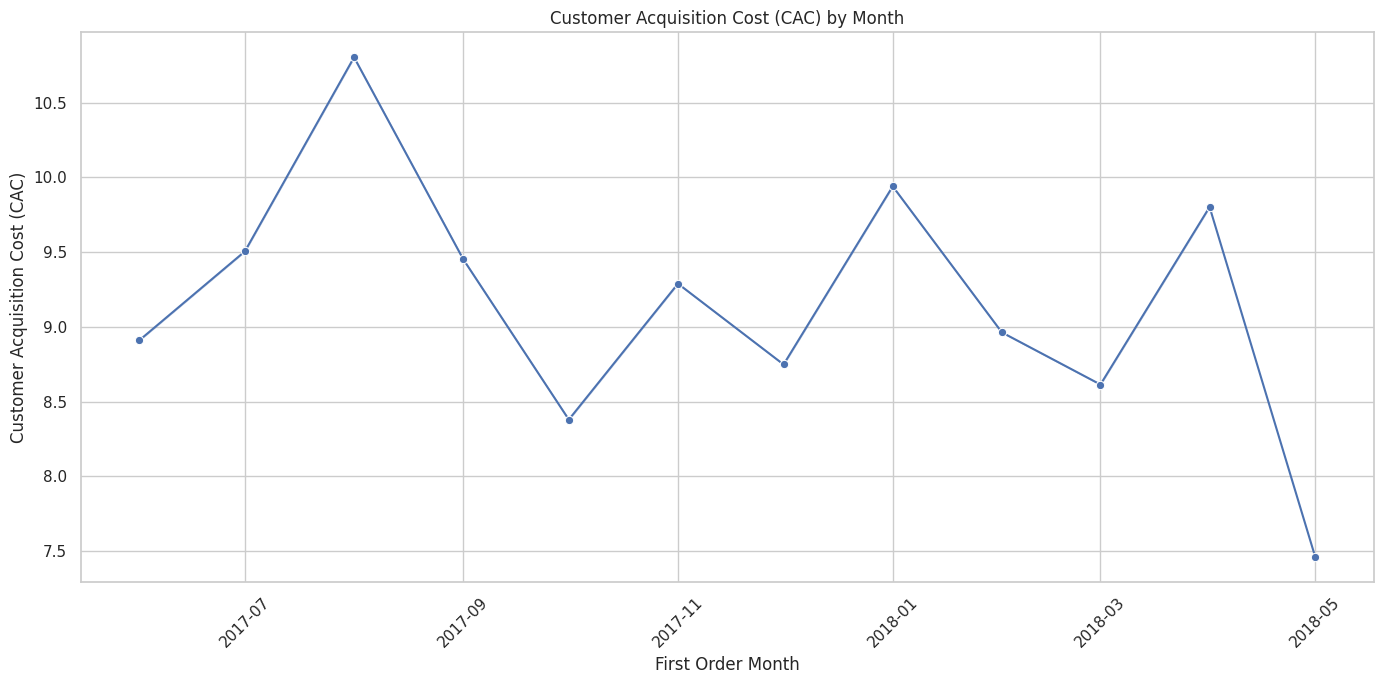

In [ ]:
sns.set(style='whitegrid')

plt.figure(figsize=(14, 7))
sns.lineplot(x='first_order_month', y='cac', data=report_, marker='o')
plt.title('Customer Acquisition Cost (CAC) by Month')
plt.xlabel('First Order Month')
plt.ylabel('Customer Acquisition Cost (CAC)')

plt.xticks(rotation=45)
plt.tight_layout()
plt.grid
plt.show()

Let's delve some key observations:

* The Customer Acquisition Cost (CAC) fluctuates significantly month to month.
* Peaks are observed in September 2017 and January 2018, where CAC exceeds 10. The lowest CAC occurs in May 2018, dropping below 8.

The fluctuations suggest that customer acquisition efforts and costs vary widely over time. High CAC might indicate periods of aggressive marketing or challenges in converting leads to customers, while low CAC might reflect more efficient acquisition strategies or reduced marketing activities. Continuous monitoring and analysis are essential to understand the underlying causes and optimize CAC over time.

And now let's find the ROMI (Return on Marketing Investment) by dividing the LTV by the CAC.

### ROMI

To calculate the cumulative ROMI, we'll use the cumsum() method, which computes the cumulative sum of elements in a series. 

For example, pd.Series([1, 2, 3]).cumsum() will return a series of three elements: 1, 3, and 6. Each value is the sum of all previous elements: 1, 3 (which is 1 + 2), and 6 (which is 1 + 2 + 3).

In [ ]:
report_['romi'] = report_['ltv'] / report_['cac']
output = report_.pivot_table(
    index='first_order_month', columns='age', values='romi', aggfunc='mean'
)

output.cumsum(axis=1).round(2)

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,0.25,0.27,0.30,0.34,0.38,0.42,0.46,0.48,0.51,0.54,0.55,0.57
2017-07-01,0.30,0.32,0.34,0.35,0.36,0.37,0.38,0.38,0.39,0.40,0.41,NaN
2017-08-01,0.24,0.26,0.28,0.30,0.32,0.34,0.35,0.36,0.38,0.38,NaN,NaN
2017-09-01,0.26,0.30,0.32,0.36,0.37,0.39,0.41,0.41,0.42,NaN,NaN,NaN
2017-10-01,0.28,0.31,0.32,0.32,0.33,0.34,0.34,0.35,NaN,NaN,NaN,NaN
2017-11-01,0.26,0.28,0.29,0.31,0.31,0.32,0.32,NaN,NaN,NaN,NaN,NaN
2017-12-01,0.25,0.27,0.28,0.29,0.29,0.30,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,0.20,0.22,0.23,0.23,0.24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,0.23,0.24,0.25,0.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We can see from this report that, overall, all cohorts began to offset investments or nearly achieved it.

Analysts often study the average cohort by averaging the ROMI or LTV of all cohorts for each month of the lifecycle. For example, let's find out how quickly cohorts on average start to offset costs. We'll average the values in each column and convert the table into a single Series object using the mean(axis=0) method:

In [ ]:
output.cumsum(axis=1).mean(axis=0)

age
0     0.253514
1     0.271228
2     0.288694
3     0.306035
4     0.327352
5     0.352820
6     0.375615
7     0.398817
8     0.426046
9     0.438855
10    0.479738
11    0.565757
dtype: float64

On average, cohorts start offsetting costs from the end of the 11th month.

Why does the platform has very low engagement and high churn rate when the cohorts are performing well? That is something out of the reach of this study.

## Recommendations

Alright, we've finally reached the point where we provide recommendations on the optimal marketing investments. 

We´ve identified the most effective marketing sources and devices and will justify our recommendations with calculated metrics and visualizations that came from our study. 

<b>General Observations:</b>

1.- User and Session Distribution:

* There are cyclical patterns in the number of users and sessions per day, with significant peaks at the end of 2017 and early 2018.
* The average number of sessions per user is low, indicating infrequent use of the application.

2.- Average Session Length (ASL):
* The average session length is approximately 10.7 minutes.
* The distribution of session durations shows that most users spend less than 15 minutes per session on the platform.

3.- Revenue:
* Revenue exhibits significant outliers, which were removed for more accurate analysis.
* The platform generates more revenue from desktop devices compared to touch devices.
* At the same time, the platform generates more revenue from sources 1 and 2 than from 3 and 4.
* Curiously enough, sources 3 and 4 are the ones which brings users the most.


4.- User Cohorts:
* There are fluctuations in revenue and the number of unique users across different cohorts, with a trend towards declining revenue from 2018 onwards.
Cohorts based on the month of first purchase show significant variations in the number of users and generated revenue.

<b>Recommendations</b>

<b>Increase User Engagement:</b>
* First of all, Y.Afisha needs to rethink its core business and decide whether increasing user engagement through diverse strategies (such as personalized push notifications and in-app promotions) is the right thing for them. If that's the case, they may start by analyzing and optimizing the most popular features to extend session durations.

<b>Revenue Optimization:</b>
* Y.Afisha needs to refocus marketing efforts on desktop devices, as they generate higher revenue.
* They also need to refocus marketing efforts on sources 1, 2 and 5. If they'd like to keep sources 3 and 4 on the premise that these are the sources that bring users the most, Y.Afisha needs to implement strategies that increace user engagement.

<b>Cohort Management:</b>
* Continue monitoring cohort metrics to identify trends and patterns in user behavior.
* Implement targeted campaigns to reactivate users from cohorts that have shown a decline in revenue and participation.

<b>Marketing Strategies:</b>
* Clearly define traffic sources and evaluate their individual effectiveness.
* Optimize investment in traffic sources that generate higher revenue and explore new marketing opportunities.